In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fds-pokemon-battles-prediction-2025/sample_submission.csv
/kaggle/input/fds-pokemon-battles-prediction-2025/test.jsonl
/kaggle/input/fds-pokemon-battles-prediction-2025/train.jsonl


# Loading and Inspecting the Data¶

When you create a notebook within a Kaggle competition, the competition's data is automatically attached and available in the ../input/ directory.

The dataset is in a .jsonl format, which means each line is a separate JSON object. This is great because we can process it one line at a time without needing to load the entire large file into memory.

Let's write a simple loop to load the training data and inspect the first battle.

In [2]:
import json

# --- OVERVIEW OF FIRST 30 TURNS---

COMPETITION_NAME = 'fds-pokemon-battles-prediction-2025'
DATA_PATH = os.path.join('../input', COMPETITION_NAME)
file_path = os.path.join(DATA_PATH, 'test.jsonl')

print(f"--- print of all first battle events from '{file_path}' ---")

try:
    # 1. opening the file "reading"
    with open(file_path, 'r') as f:
        first_line = f.readline()

    # 2. If not empty it's ok
    if first_line:
        first_battle = json.loads(first_line)
        
        # 3. Battle timeline
        battle_timeline = first_battle.get('battle_timeline', [])
        
        if battle_timeline:
            # 4. print Event i
            for i, event in enumerate(battle_timeline, 1):
                print(f"\n--- Evento {i} ---")
                print(event)
            print(f"\n--- Fine della timeline: {len(battle_timeline)} eventi totali. ---")
        else:
            print("the first timeline battle is empty or doesn't exist")
    else:
        print("Ops the file seems empty")

except FileNotFoundError:
    print(f"ERROR: File don't in '{file_path}'.")
except json.JSONDecodeError:
    print("ERROR: the first row is not in JSON edit")

--- print of all first battle events from '../input/fds-pokemon-battles-prediction-2025/test.jsonl' ---

--- Evento 1 ---
{'turn': 1, 'p1_pokemon_state': {'name': 'chansey', 'hp_pct': 1.0, 'status': 'par', 'effects': ['noeffect'], 'boosts': {'atk': 0, 'def': 0, 'spa': 0, 'spd': 0, 'spe': 0}}, 'p1_move_details': None, 'p2_pokemon_state': {'name': 'jolteon', 'hp_pct': 1.0, 'status': 'nostatus', 'effects': ['noeffect'], 'boosts': {'atk': 0, 'def': 0, 'spa': 0, 'spd': 0, 'spe': 0}}, 'p2_move_details': {'name': 'thunderwave', 'type': 'ELECTRIC', 'category': 'STATUS', 'base_power': 0, 'accuracy': 1.0, 'priority': 0}}

--- Evento 2 ---
{'turn': 2, 'p1_pokemon_state': {'name': 'chansey', 'hp_pct': 1.0, 'status': 'par', 'effects': ['noeffect'], 'boosts': {'atk': 0, 'def': 0, 'spa': 0, 'spd': 0, 'spe': 0}}, 'p1_move_details': None, 'p2_pokemon_state': {'name': 'chansey', 'hp_pct': 1.0, 'status': 'nostatus', 'effects': ['noeffect'], 'boosts': {'atk': 0, 'def': 0, 'spa': 0, 'spd': 0, 'spe': 0}}, '

In [3]:
import json
import pandas as pd
import os

# --- Define the path to our data ---
COMPETITION_NAME = 'fds-pokemon-battles-prediction-2025'
DATA_PATH = os.path.join('../input', COMPETITION_NAME)

train_file_path = os.path.join(DATA_PATH, 'train.jsonl')
test_file_path = os.path.join(DATA_PATH, 'test.jsonl')
train_data = []

# Read the file line by line
print(f"Loading data from '{train_file_path}'...")
try:
    with open(train_file_path, 'r') as f:
        for line in f:
            # json.loads() parses one line (one JSON object) into a Python dictionary
            train_data.append(json.loads(line))

    print(f"Successfully loaded {len(train_data)} battles.")

    # Let's inspect the first battle to see its structure
    print("\n--- Structure of the first train battle: ---")
    if train_data:
        first_battle = train_data[0]
        
        # To keep the output clean, we can create a copy and truncate the timeline
        battle_for_display = first_battle.copy()
        battle_for_display['battle_timeline'] = battle_for_display.get('battle_timeline', [])[:2] # Show first 2 turns
        
        # Use json.dumps for pretty-printing the dictionary
        print(json.dumps(battle_for_display, indent=4))
        if len(first_battle.get('battle_timeline', [])) > 3:
            print("    ...")
            print("    (battle_timeline has been truncated for display)")


except FileNotFoundError:
    print(f"ERROR: Could not find the training file at '{train_file_path}'.")
    print("Please make sure you have added the competition data to this notebook.")



Loading data from '../input/fds-pokemon-battles-prediction-2025/train.jsonl'...
Successfully loaded 10000 battles.

--- Structure of the first train battle: ---
{
    "player_won": true,
    "p1_team_details": [
        {
            "name": "starmie",
            "level": 100,
            "types": [
                "psychic",
                "water"
            ],
            "base_hp": 60,
            "base_atk": 75,
            "base_def": 85,
            "base_spa": 100,
            "base_spd": 100,
            "base_spe": 115
        },
        {
            "name": "exeggutor",
            "level": 100,
            "types": [
                "grass",
                "psychic"
            ],
            "base_hp": 95,
            "base_atk": 95,
            "base_def": 85,
            "base_spa": 125,
            "base_spd": 125,
            "base_spe": 55
        },
        {
            "name": "chansey",
            "level": 100,
            "types": [
                "normal",

# Useful dictionaries

In [4]:
pokedex = {
    'venusaur': {'types': ['grass', 'poison'], 'base_hp': 0.8, 'base_atk': 0.49, 'base_def': 0.49, 'base_spa': 1.0, 'base_spd': 1.0, 'base_spe': 0.8 },
    'charizard': {'types': ['fire', 'flying'], 'base_hp': 0.78, 'base_atk': 0.84, 'base_def': 0.78, 'base_spa': 1.09, 'base_spd': 0.85, 'base_spe': 1.0 }, 
    'blastoise': {'types': ['water', 'notype'], 'base_hp': 0.79, 'base_atk': 0.83, 'base_def': 1.0, 'base_spa': 0.85, 'base_spd': 1.05, 'base_spe': 0.78 },
    'butterfree': { 'types': ['bug', 'flying'], 'base_hp': 0.6, 'base_atk': 0.45, 'base_def': 0.5, 'base_spa': 0.9, 'base_spd': 0.8, 'base_spe': 0.7 },
    'beedrill': {'types':['bug', 'poison'], 'base_hp': 0.65, 'base_atk': 0.9, 'base_def': 0.4, 'base_spa': 0.45, 'base_spd': 0.8, 'base_spe': 0.75 },
    'pidgeot': {'types': ['normal', 'flying'], 'base_hp': 0.83, 'base_atk': 0.8, 'base_def': 0.75, 'base_spa': 0.7, 'base_spd': 0.7, 'base_spe': 1.01 },
    'raticate': {'types': ['normal', 'notype'], 'base_hp': 0.55, 'base_atk': 0.81, 'base_def': 0.6, 'base_spa': 0.5, 'base_spd': 0.7, 'base_spe': 0.97 },
    'fearow': {'types': ['normal', 'flying'], 'base_hp': 0.65, 'base_atk': 0.9, 'base_def': 0.65, 'base_spa': 0.61, 'base_spd': 0.61, 'base_spe': 1.0 },
    'arbok': {'types': ['poison', 'notype'], 'base_hp': 0.6, 'base_atk': 0.95, 'base_def': 0.69, 'base_spa': 0.65, 'base_spd': 0.79, 'base_spe': 0.8 }, 
    'raichu': {'types': ['electric', 'notype'], 'base_hp': 0.6, 'base_atk': 0.9, 'base_def': 0.55, 'base_spa': 0.9, 'base_spd': 0.8, 'base_spe': 1.1 },
    'sandslash': {'types': ['ground', 'notype'], 'base_hp': 0.75, 'base_atk': 1.0, 'base_def': 1.1, 'base_spa': 0.45, 'base_spd': 0.55, 'base_spe': 0.65 },
    'nidoqueen': {'types': ['poison', 'ground'], 'base_hp': 0.9, 'base_atk': 0.92, 'base_def': 0.87, 'base_spa': 0.75, 'base_spd': 0.85, 'base_spe': 0.76 },
    'nidoking': {'types': ['poison', 'ground'], 'base_hp': 0.81, 'base_atk': 1.02, 'base_def': 0.77, 'base_spa': 0.85, 'base_spd': 0.75, 'base_spe': 0.85 },
    'clefable': {'types': ['normal', 'notype'], 'base_hp': 0.95, 'base_atk': 0.7, 'base_def': 0.73, 'base_spa': 0.95, 'base_spd': 0.9, 'base_spe': 0.6 },
    'ninetales': {'types': ['fire','notype'], 'base_hp': 0.73, 'base_atk': 0.76, 'base_def': 0.75, 'base_spa': 0.81, 'base_spd': 1.0, 'base_spe': 1.0 },
    'wigglytuff': {'types': ['normal', 'notype'], 'base_hp': 1.4, 'base_atk': 0.7, 'base_def': 0.45, 'base_spa': 0.85, 'base_spd': 0.5, 'base_spe': 0.45 },
    'golbat': {'types': ['poison', 'flying'], 'base_hp': 0.75, 'base_atk': 0.8, 'base_def': 0.7, 'base_spa': 0.65, 'base_spd': 0.75, 'base_spe': 0.9 }, 
    'vileplume': {'types': ['grass', 'poison'], 'base_hp': 0.75, 'base_atk': 0.8, 'base_def': 0.85, 'base_spa': 1.1, 'base_spd': 0.9, 'base_spe': 0.5 },
    'parasect': {'types': ['bug', 'grass'], 'base_hp': 0.6, 'base_atk': 0.95, 'base_def': 0.8, 'base_spa': 0.6, 'base_spd': 0.8, 'base_spe': 0.3 },
    'venomoth': {'types': ['bug', 'poison'], 'base_hp': 0.7, 'base_atk': 0.65, 'base_def': 0.6, 'base_spa': 0.9, 'base_spd': 0.75, 'base_spe': 0.9 },
    'dugtrio': {'types': ['ground', 'notype'], 'base_hp': 0.35, 'base_atk': 1.0, 'base_def': 0.5, 'base_spa': 0.5, 'base_spd': 0.7, 'base_spe': 1.2 },
    'persian': {'types': ['normal', 'notype'], 'base_hp': 0.65, 'base_atk': 0.7, 'base_def': 0.6, 'base_spa': 0.65, 'base_spd': 0.65, 'base_spe': 1.15 }, 
    'golduck': {'types': ['water', 'notype'], 'base_hp': 0.8, 'base_atk': 0.82, 'base_def': 0.78, 'base_spa': 0.95, 'base_spd': 0.8, 'base_spe': 0.85 },
    'primeape': {'types': ['fighting', 'notype'], 'base_hp': 0.65, 'base_atk': 1.05, 'base_def': 0.6, 'base_spa': 0.6, 'base_spd': 0.7, 'base_spe': 0.95 },
    'arcanine': {'types': ['fire', 'notype'], 'base_hp': 0.9, 'base_atk': 1.1, 'base_def': 0.8, 'base_spa': 1.0, 'base_spd': 0.8, 'base_spe': 0.95 },
    'poliwrath': {'types': ['water', 'fighting'], 'base_hp': 0.9, 'base_atk': 0.95, 'base_def': 0.95, 'base_spa': 0.7, 'base_spd': 0.9, 'base_spe': 0.7 },
    'alakazam': {'types': ['psychic', 'notype'], 'base_hp': 0.55, 'base_atk': 0.5, 'base_def': 0.45, 'base_spa': 1.35, 'base_spd': 0.95, 'base_spe': 1.2 },
    'machamp': {'types': ['fighting', 'notype'], 'base_hp': 0.9, 'base_atk': 1.3, 'base_def': 0.8, 'base_spa': 0.65, 'base_spd': 0.85, 'base_spe': 0.55 }, 
    'victreebel': {'types': ['grass', 'poison'], 'base_hp': 0.8, 'base_atk': 1.05, 'base_def': 0.65, 'base_spa': 1.0, 'base_spd': 0.7, 'base_spe': 0.7 },
    'tentacruel': {'types': ['water', 'poison'], 'base_hp': 0.8, 'base_atk': 0.7, 'base_def': 0.65, 'base_spa': 0.8, 'base_spd': 1.2, 'base_spe': 1.0 },
    'golem': {'types': ['rock', 'ground'], 'base_hp': 0.8, 'base_atk': 1.2, 'base_def': 1.3, 'base_spa': 0.55, 'base_spd': 0.65, 'base_spe': 0.45 },
    'rapidash': {'types': ['fire', 'notype'], 'base_hp': 0.65, 'base_atk': 1.0, 'base_def': 0.7, 'base_spa': 0.8, 'base_spd': 0.8, 'base_spe': 1.05 },
    'slowbro': {'types': ['water', 'psychic'], 'base_hp': 0.95, 'base_atk': 0.75, 'base_def': 1.1, 'base_spa': 1.0, 'base_spd': 0.8, 'base_spe': 0.3 },
    'magneton': {'types': ['electric', 'notype'], 'base_hp': 0.5, 'base_atk': 0.6, 'base_def': 0.95, 'base_spa': 1.2, 'base_spd': 0.7, 'base_spe': 0.7 },
    'dodrio': {'types': ['normal', 'flying'], 'base_hp': 0.6, 'base_atk': 1.1, 'base_def': 0.7, 'base_spa': 0.6, 'base_spd': 0.6, 'base_spe': 1.1 }, 
    'dewgong': {'types': ['water', 'ice'], 'base_hp': 0.9, 'base_atk': 0.7, 'base_def': 0.8, 'base_spa': 0.7, 'base_spd': 0.95, 'base_spe': 0.7 },
    'muk': {'types': ['poison', 'notype'], 'base_hp': 1.05, 'base_atk': 1.05, 'base_def': 0.75, 'base_spa': 0.65, 'base_spd': 1.0, 'base_spe': 0.5 },
    'cloyster': {'types': ['water', 'ice'], 'base_hp': 0.5, 'base_atk': 0.95, 'base_def': 1.8, 'base_spa': 0.85, 'base_spd': 0.45, 'base_spe': 0.7 },
    'gengar': {'types': ['ghost', 'poison'], 'base_hp': 0.6, 'base_atk': 0.65, 'base_def': 0.6, 'base_spa': 1.3, 'base_spd': 0.75, 'base_spe': 1.1 },
    'onix': {'types': ['rock', 'ghost'], 'base_hp': 0.35, 'base_atk': 0.45, 'base_def': 1.6, 'base_spa': 0.3, 'base_spd': 0.45, 'base_spe': 0.7 },
    'hypno': {'types': ['pychic', 'notype'], 'base_hp': 0.85, 'base_atk': 0.73, 'base_def': 0.7, 'base_spa': 0.73, 'base_spd': 1.15, 'base_spe': 0.67 },
    'kingler': {'types': ['water', 'notype'], 'base_hp': 0.55, 'base_atk': 1.3, 'base_def': 1.15, 'base_spa': 0.5, 'base_spd': 0.5, 'base_spe': 0.75 },
    'electrode': {'types': ['electric', 'notype'], 'base_hp': 0.6, 'base_atk': 0.5, 'base_def': 0.7, 'base_spa': 0.8, 'base_spd': 0.8, 'base_spe': 1.5 }, 
    'exeggutor': {'types': ['grass', 'psychic'], 'base_hp': 0.95, 'base_atk': 0.95, 'base_def': 0.85, 'base_spa': 1.25, 'base_spd': 0.75, 'base_spe': 0.55 },
    'marowak': {'types': ['ground', 'notype'], 'base_hp': 0.6, 'base_atk': 0.8, 'base_def': 1.1, 'base_spa': 0.5, 'base_spd': 0.8, 'base_spe': 0.45 }, 
    'hitmonchan': {'types': ['fighting', 'notype'], 'base_hp': 0.5, 'base_atk': 1.05, 'base_def': 0.79, 'base_spa': 0.35, 'base_spd': 1.1, 'base_spe': 0.76 }, 
    'lickitung': {'types': ['normal', 'notype'], 'base_hp': 0.9, 'base_atk': 0.55, 'base_def': 0.75, 'base_spa': 0.6, 'base_spd': 0.75, 'base_spe': 0.3 }, 
    'weezing': {'types': ['poison', 'notype'], 'base_hp': 0.65, 'base_atk': 0.9, 'base_def': 1.2, 'base_spa': 0.85, 'base_spd': 0.7, 'base_spe': 0.6 }, 
    'rhydon': {'types': ['ground', 'rock'], 'base_hp': 1.05, 'base_atk': 1.3, 'base_def': 1.2, 'base_spa': 0.45, 'base_spd': 0.45, 'base_spe': 0.4 }, 
    'chansey': {'types': ['normal', 'notype'], 'base_hp': 2.5, 'base_atk': 0.05, 'base_def': 0.05, 'base_spa': 0.35, 'base_spd': 1.05, 'base_spe': 0.5 },
    'tangela': {'types': ['grass', 'notype'], 'base_hp': 0.65, 'base_atk': 0.55, 'base_def': 1.15, 'base_spa': 1.0, 'base_spd': 0.4, 'base_spe': 0.6 }, 
    'kangaskhan': {'types': ['normal', 'notype'], 'base_hp': 1.05, 'base_atk': 0.95, 'base_def': 0.8, 'base_spa': 0.4, 'base_spd': 0.8, 'base_spe': 0.9 }, 
    'seadra': {'types': ['water', 'notype'], 'base_hp': 0.55, 'base_atk': 0.65, 'base_def': 0.95, 'base_spa': 0.95, 'base_spd': 0.45, 'base_spe': 0.85 }, 
    'seaking': {'types': ['water', 'notype'], 'base_hp': 0.8, 'base_atk': 0.92, 'base_def': 0.65, 'base_spa': 0.65, 'base_spd': 0.8, 'base_spe': 0.68 }, 
    'starmie': {'types': ['water', 'psychic'], 'base_hp': 0.6, 'base_atk': 0.75, 'base_def': 0.85, 'base_spa': 1.0, 'base_spd': 0.85, 'base_spe': 1.15 },
    'mime': {'types': ['psychic', 'notype'], 'base_hp': 0.4, 'base_atk': 0.45, 'base_def': 0.65, 'base_spa': 1.0, 'base_spd': 1.2, 'base_spe': 0.9 },
    'scyther': {'types': ['bug', 'flying'], 'base_hp': 0.7, 'base_atk': 1.1, 'base_def': 0.8, 'base_spa': 0.55, 'base_spd': 0.8, 'base_spe': 1.05 },
    'jynx': {'types': ['ice', 'psychic'], 'base_hp': 0.65, 'base_atk': 0.5, 'base_def': 0.35, 'base_spa': 1.15, 'base_spd': 0.95, 'base_spe': 0.95 }, 
    'electabuzz': {'types': ['electric', 'notype'], 'base_hp': 0.65, 'base_atk': 0.83, 'base_def': 0.57, 'base_spa': 0.95, 'base_spd': 0.85, 'base_spe': 1.05 }, 
    'magmar': {'types': ['fire', 'notype'], 'base_hp': 0.65, 'base_atk': 0.95, 'base_def': 0.57, 'base_spa': 1.0, 'base_spd': 0.85, 'base_spe': 0.93 },
    'pinsir': {'types': ['bug', 'notype'], 'base_hp': 0.65, 'base_atk': 1.25, 'base_def': 1.0, 'base_spa': 0.55, 'base_spd': 0.7, 'base_spe': 0.85 }, 
    'tauros': {'types': ['normal', 'notype'], 'base_hp': 0.75, 'base_atk': 1.0, 'base_def': 0.95, 'base_spa': 0.4, 'base_spd': 0.7, 'base_spe': 1.1 },
    'gyarados': {'types': ['water', 'flying'], 'base_hp': 0.95, 'base_atk': 1.25, 'base_def': 0.79, 'base_spa': 0.6, 'base_spd': 1.0, 'base_spe': 0.81 }, 
    'lapras': {'types': ['water', 'ice'], 'base_hp': 1.3, 'base_atk': 0.85, 'base_def': 0.8, 'base_spa': 0.85, 'base_spd': 0.95, 'base_spe': 0.6 },
    'ditto': {'types': ['normal', 'notype'], 'base_hp': 0.48, 'base_atk': 0.48, 'base_def': 0.48, 'base_spa': 0.48, 'base_spd': 0.48, 'base_spe': 0.48 }, 
    'vaporeon': {'types': ['water', 'notype'], 'base_hp': 1.3, 'base_atk': 0.65, 'base_def': 0.6, 'base_spa': 1.1, 'base_spd': 0.95, 'base_spe': 0.65 }, 
    'jolteon': {'types': ['electric', 'notype'], 'base_hp': 0.65, 'base_atk': 0.65, 'base_def': 0.6, 'base_spa': 1.1, 'base_spd': 0.95, 'base_spe': 1.3 },
    'flareon': {'types': ['fire', 'notype'], 'base_hp': 0.65, 'base_atk': 1.3, 'base_def': 0.6, 'base_spa': 0.95, 'base_spd': 1.1, 'base_spe': 0.65 }, 
    'porygon': {'types': ['normal', 'notype'], 'base_hp': 0.65, 'base_atk': 0.6, 'base_def': 0.7, 'base_spa': 0.85, 'base_spd': 0.75, 'base_spe': 0.4 },
    'omastar': {'types': ['rock', 'water'], 'base_hp': 0.7, 'base_atk': 0.6, 'base_def': 1.25, 'base_spa': 1.15, 'base_spd': 0.7, 'base_spe': 0.55 }, 
    'kabutops': {'types': ['rock', 'water'], 'base_hp': 0.6, 'base_atk': 1.15, 'base_def': 1.05, 'base_spa': 0.65, 'base_spd': 0.7, 'base_spe': 0.8 }, 
    'aerodactyl': {'types': ['rock', 'flying'], 'base_hp': 0.8, 'base_atk': 1.05, 'base_def': 0.65, 'base_spa': 0.6, 'base_spd': 0.75, 'base_spe': 1.3 },
    'snorlax': {'types': ['normal', 'notype'], 'base_hp': 1.6, 'base_atk': 1.1, 'base_def': 0.65, 'base_spa': 0.65, 'base_spd': 1.1, 'base_spe': 0.3 },
    'articuno': {'types': ['ice', 'flying'], 'base_hp': 0.9, 'base_atk': 0.85, 'base_def': 1.0, 'base_spa': 0.95, 'base_spd': 1.25, 'base_spe': 0.85 },
    'zapdos': {'types': ['electric', 'flying'], 'base_hp': 0.9, 'base_atk': 0.9, 'base_def': 0.85, 'base_spa': 1.25, 'base_spd': 0.9, 'base_spe': 1.0 },
    'moltres': {'types': ['fire', 'flying'], 'base_hp': 0.9, 'base_atk': 1.0, 'base_def': 0.9, 'base_spa': 1.25, 'base_spd': 0.85, 'base_spe': 0.9 }, 
    'dragonite': {'types': ['dragon', 'flying'], 'base_hp': 0.91, 'base_atk': 1.34, 'base_def': 0.95, 'base_spa': 1.0, 'base_spd': 1.0, 'base_spe': 0.8 }, 
    'mewtwo': {'types': ['psychic', 'notype'], 'base_hp': 1.06, 'base_atk': 1.1, 'base_def': 0.9, 'base_spa': 1.54, 'base_spd': 0.9, 'base_spe': 1.3 },
    'mew': {'types': ['psychic', 'notype'], 'base_hp': 1.0, 'base_atk': 1.0, 'base_def': 1.0, 'base_spa': 1.0, 'base_spd': 1.0, 'base_spe': 1.0 },
    'noname': {'types': ['notype', 'notype'], 'base_hp': 0.7847, 'base_atk': 0.8568, 'base_def': 0.7932, 'base_spa': 0.8058, 'base_spd': 0.8099, 'base_spe': 0.8044 } # Pokemon generico: media di tutti i valori base dei pokemon
}

malus_weights = {
    'frz' : 1.0,
    'slp' : 0.9,
    'par': 0.75,
    'brn' : 0.6,
    'psn' : 0.25,
    'tox' : 0.25,
    'trapped' : 0.6, 
    'confused' : 0.5,
    'leechseed' : 0.3,
    'flinch' : 0.0
}

TYPE_CHART_GEN1 = {
    'normal': {'rock': 0.5, 'ghost': 0},
    'fire': {'fire': 0.5, 'water': 0.5, 'grass': 2, 'ice': 2, 'bug': 2, 'rock': 0.5, 'dragon': 0.5},
    'water': {'fire': 2, 'water': 0.5, 'grass': 0.5, 'ground': 2, 'rock': 2, 'dragon': 0.5},
    'electric': {'water': 2, 'electric': 0.5, 'grass': 0.5, 'ground': 0, 'flying': 2, 'dragon': 0.5},
    'grass': {'fire': 0.5, 'water': 2, 'grass': 0.5, 'poison': 0.5, 'ground': 2, 'flying': 0.5, 'bug': 0.5, 'rock': 2, 'dragon': 0.5},
    'ice': {'water': 0.5, 'grass': 2, 'ice': 0.5, 'ground': 2, 'flying': 2, 'dragon': 2},
    'fighting': {'normal': 2, 'ice': 2, 'poison': 0.5, 'flying': 0.5, 'psychic': 0.5, 'bug': 0.5, 'rock': 2, 'ghost': 0},
    'poison': {'grass': 2, 'poison': 0.5, 'ground': 0.5, 'rock': 0.5, 'ghost': 0.5, 'bug': 2},
    'ground': {'fire': 2, 'electric': 2, 'grass': 0.5, 'poison': 2, 'flying': 0, 'bug': 0.5, 'rock': 2},
    'flying': {'electric': 0.5, 'grass': 2, 'fighting': 2, 'bug': 2, 'rock': 0.5},
    'psychic': {'fighting': 2, 'poison': 2, 'psychic': 0.5, 'ghost': 0},
    'bug': {'fire': 0.5, 'grass': 2, 'fighting': 0.5, 'poison': 2, 'flying': 0.5, 'psychic': 2, 'ghost': 0.5},
    'rock': {'fire': 2, 'ice': 2, 'fighting': 0.5, 'ground': 0.5, 'flying': 2, 'bug': 2},
    'ghost': {'normal': 0, 'ghost': 2, 'psychic': 0},
    'dragon': {'dragon': 2},
}

GEN1_PHYSICAL_TYPES = ['normal', 'fighting', 'flying', 'ground', 'rock', 'bug', 'poison', 'ghost']
GEN1_SPECIAL_TYPES = ['fire', 'water', 'electric', 'grass', 'ice', 'psychic', 'dragon']


# Auxiliary Functions and Structures

In [5]:
# Module 1: Auxiliary Functions and Structures


'''function that returns names and stats of the pokemon we know '''
def create_dict_team(names: list): 
    i = 1
    stats = {}
    for name in names: 
       if name in pokedex.keys(): stats[name] = pokedex.get(name)
       else: stats[name] = pokedex.get('noname')
    # In order to have 6 pokemon, add 'noname' placeholders        
    while len(stats) < 6:
        new_key = f'noname_{i}'
        if new_key not in stats:
            stats[new_key] = pokedex.get('noname')
        i += 1
    return stats


'''function that studies the pokemon alive in the last round and compares the types and their possible advantages on the types of the opponents'''
# The lists contain the names of the remaining pokemon alive in the last turn
# name1 = attacker's team, defender's team
def battle_of_types(names1:list, names2:list):
    count_type_adv = 0
    for poke1 in names1 : 
        type1 = pokedex.get(poke1,{}).get('types') # Types of attacker's team 
        for poke2 in names2 : 
            type2 = pokedex.get(poke2,{}).get('types')    # Types of defender's team
            for types in type1: 
                if types == 'notype': continue
                diz1 = TYPE_CHART_GEN1.get(types)
                for key,value in diz1.items():
                    if value == 2 and key in type2: count_type_adv += 1      
    return count_type_adv


'''make a dictionary with the dynamic stats we know: hp level and status'''
def latest_dict_stats(timeline, all_names1:dict , all_names2:dict) :
    dyn_stats1 = {}
    dyn_stats2 = {}
    # Initialize the dictionaries 
    for name in all_names1:
        dyn_stats1[name] = {'hp': 1.0, 'status': 'nostatus', 'effects': ['noeffect']}
    for name in all_names2:
        dyn_stats2[name] = {'hp': 1.0, 'status': 'nostatus', 'effects': ['noeffect']}
    # Dynamically update the dictionaries during the battle
    for event in timeline:
        name1=event.get('p1_pokemon_state').get('name')
        name2=event.get('p2_pokemon_state').get('name')
        dyn_stats1[name1]['hp'] = event.get('p1_pokemon_state').get('hp_pct')
        dyn_stats2[name2]['hp'] = event.get('p2_pokemon_state').get('hp_pct')
        dyn_stats1[name1]['status'] = event.get('p1_pokemon_state').get('status')
        dyn_stats2[name2]['status'] = event.get('p2_pokemon_state').get('status')
        dyn_stats1[name1]['effects'] = event.get('p2_pokemon_state').get('effects')
        dyn_stats2[name2]['effects'] = event.get('p2_pokemon_state').get('effects')
    return dyn_stats1, dyn_stats2


''' count how many times the players switched pokemon '''
def switch_count(timeline ):
    switch_count1 = 0
    switch_count2 = 0
    pok1_prec = timeline[0].get('p1_pokemon_state').get('name')
    pok2_prec = timeline[0].get('p2_pokemon_state').get('name') 
    for event in timeline:
        pok1_curr = event.get('p1_pokemon_state').get('name')
        pok2_curr = event.get('p2_pokemon_state').get('name')
        if pok1_prec is not None:
            if pok1_curr != pok1_prec:
                switch_count1 += 1
        if pok2_prec is not None:
            if pok2_curr != pok2_prec:
                switch_count2 += 1
        pok1_prec = pok1_curr
        pok2_prec = pok2_curr
    return switch_count1 , switch_count2



# Basic Feature Engineering¶

A successful model will likely require creating many complex features. For this starter notebook, however, we will create a very simple feature set based only on the initial team stats. This will be enough to train a model and generate a submission file.

It's up to you to engineer more powerful features!

In [6]:
# Module 2: Feature Engineering
from tqdm.notebook import tqdm
import numpy as np

def all_features(data: list[dict]) -> pd.DataFrame:

    feature_list = []
    for battle in tqdm(data, desc="Extracting static features"):
        feature = {}
        feature['battle_id'] = battle.get('battle_id')
        timeline = battle.get('battle_timeline', [])
        all_names1 = []
        all_names2 = []
        count_ko1 = 0
        count_ko2 = 0
        count_malus1 = 0
        count_malus2 = 0
        
        # Save the names of the revealed pokemon
        for event in timeline: 
            if event.get('p1_pokemon_state').get('name') not in all_names1: all_names1.append(event.get('p1_pokemon_state').get('name'))
            if event.get('p2_pokemon_state').get('name') not in all_names2: all_names2.append(event.get('p2_pokemon_state').get('name'))
        revealed_p2=len(all_names2)
        revealed_p1=len(all_names1)

        # For team 1, add the reamining known pokemon
        for pokemon in battle.get('p1_team_details',[]) : 
            name=pokemon.get('name')
            if pokemon not in all_names1 : all_names1.append(name)
        # Create dictionaries containing all the BASE stats of known pokemon, 6 for team 1 and <= 6 for team 2          
        dict_stats1 = create_dict_team(all_names1)    
        dict_stats2 = create_dict_team(all_names2)   
        
        # Dynamic dictionaries, they show the stats of the remaining pokemon in the last round we have 
        if timeline: dyn_stats1,dyn_stats2 = latest_dict_stats(timeline, all_names1, all_names2)

        # List of the names of the remaining pokemon for each team (for team 2, each unknown pokemon has no name)
        final_names1 = all_names1
        final_names2 = all_names2
        
        # Count how many Pokemon are KO 
        for name in dyn_stats1.keys(): 
            if dyn_stats1[name]['status'] == 'fnt' : 
                count_ko1 += 1
                final_names1.remove(name)
        for name in dyn_stats2.keys(): 
            if dyn_stats2[name]['status'] == 'fnt' : 
                count_ko2 += 1
                final_names2.remove(name)
       
       
        # Weighted calculation of malus effects (volatile and non volatile)
        for name in dyn_stats1.keys(): 
            if dyn_stats1[name]['status'] != 'nostatus'  and dyn_stats1[name]['status'] != 'fnt': 
                count_malus1 += malus_weights.get(dyn_stats1[name]['status'], 0.0)
            if dyn_stats1[name]['effects'][0] != 'noeffect':
                for effect in dyn_stats1[name]['effects']:
                    count_malus1 += malus_weights.get(effect, 0.0)
        
        for name in dyn_stats2.keys(): 
            if dyn_stats2[name]['status'] != 'nostatus' and dyn_stats2[name]['status']!='fnt': 
                count_malus2 += malus_weights.get(dyn_stats2[name]['status'], 0)
            if dyn_stats2[name]['effects'][0] != 'noeffect':
                for effect in dyn_stats2[name]['effects']:
                    count_malus2 += malus_weights.get(effect, 0.0)
        
        type_adv1=battle_of_types(final_names1, final_names2)
        type_adv2=battle_of_types(final_names2, final_names1)

        switch_count1, switch_count2 = switch_count(timeline)



        # Static features 
        feature['p1_mean_hp']= np.mean([dict_stats1[p].get('base_hp', 0) for p in dict_stats1.keys()])
        feature['p1_mean_spe']= np.mean([dict_stats1[p].get('base_spe', 0) for p in dict_stats1.keys()])
        feature['p1_mean_atk']= np.mean([dict_stats1[p].get('base_atk', 0) for p in dict_stats1.keys()])
        feature['p1_mean_def']= np.mean([dict_stats1[p].get('base_def', 0) for p in dict_stats1.keys()])
        feature['p1_mean_spa']= np.mean([dict_stats1[p].get('base_spa', 0) for p in dict_stats1.keys()])
        feature['p1_mean_spd']= np.mean([dict_stats1[p].get('base_spd', 0) for p in dict_stats1.keys()])

        feature['p2_mean_hp']= np.mean([dict_stats2[p].get('base_hp', 0) for p in dict_stats2.keys()])
        feature['p2_mean_spe']= np.mean([dict_stats2[p].get('base_spe', 0) for p in dict_stats2.keys()])
        feature['p2_mean_atk']= np.mean([dict_stats2[p].get('base_atk', 0) for p in dict_stats2.keys()])
        feature['p2_mean_def']= np.mean([dict_stats2[p].get('base_def', 0) for p in dict_stats2.keys()])
        feature['p2_mean_spa']= np.mean([dict_stats2[p].get('base_spa', 0) for p in dict_stats2.keys()])
        feature['p2_mean_spd']= np.mean([dict_stats2[p].get('base_spd', 0) for p in dict_stats2.keys()])

        feature['diff_atk'] = np.sum([dict_stats1[p].get('base_atk', 0) for p in dyn_stats1.keys() if p in final_names1]) - np.sum([dict_stats2[p].get('base_atk', 0) for p in dyn_stats2.keys() if p in final_names2])
        feature['diff_def'] = np.sum([dict_stats1[p].get('base_def', 0) for p in dyn_stats1.keys() if p in final_names1]) - np.sum([dict_stats2[p].get('base_def', 0) for p in dyn_stats2.keys() if p in final_names2])
        feature['diff_spa'] = np.sum([dict_stats1[p].get('base_spa', 0) for p in dyn_stats1.keys() if p in final_names1]) - np.sum([dict_stats2[p].get('base_spa', 0) for p in dyn_stats2.keys() if p in final_names2])
        feature['diff_spd'] = np.sum([dict_stats1[p].get('base_spd', 0) for p in dyn_stats1.keys() if p in final_names1]) - np.sum([dict_stats2[p].get('base_spd', 0) for p in dyn_stats2.keys() if p in final_names2])
        
        # Dynamic features
        feature['ko_p1'] = count_ko1
        feature['ko_p2'] = count_ko2
        feature['ko_diff']= count_ko1 - count_ko2
        
        # Feature: mean of final hp values in the last turn
        feature['p1_mean_hp_final']= np.mean([dyn_stats1[p].get('hp', 0) for p in dyn_stats1.keys() if p in final_names1 and p != 'noname'])
        feature['p2_mean_hp_final']= (np.sum([dyn_stats2[p].get('hp', 0) for p in dyn_stats2.keys() if p in final_names2 and p != 'noname'])+((6-len(final_names2)-count_ko2)*0.7847))/(6-count_ko2) # we add a mean hp value for each unknown pokemon
        # Feature: sum of final hp values in the last turn
        feature['p1_sum_hp_final']= np.sum([dyn_stats1[p].get('hp', 0) for p in dyn_stats1.keys() if p in final_names1])
        feature['p2_sum_hp_final']= np.sum([dyn_stats2[p].get('hp', 0) for p in dyn_stats2.keys() if p in final_names2]) + (6-len(final_names2)-count_ko2)*0.7847 # we add a mean hp value for each unknown pokemon
        feature['p1_malus'] = count_malus1
        feature['p2_malus'] = count_malus2
        feature['adv_type1'] = type_adv1 
        feature['adv_type2'] = type_adv2
        feature['adv_type_diff'] = type_adv1 - type_adv2

        feature['revealed_diff'] = revealed_p1 - revealed_p2
        feature['revealed_p2'] = revealed_p2
        feature['revealed_p1'] = revealed_p1

        feature['switch_p1'] = switch_count1
        feature['switch_p2'] = switch_count2
        feature['switch_diff'] = switch_count1 - switch_count2
        
        if 'player_won' in battle:
            feature['player_won'] = int(battle['player_won'])

        feature_list.append(feature)

    return pd.DataFrame(feature_list).fillna(0)
    
print("Processing training data...")

train_df = all_features(train_data) 

print("\nProcessing test data (All Features)...")
test_data = []
with open(test_file_path, 'r') as f:
    for line in f:
        test_data.append(json.loads(line))

test_df = all_features(test_data)

print("\nFeatures preview:")
display(train_df.head())   

Processing training data...


Extracting static features:   0%|          | 0/10000 [00:00<?, ?it/s]


Processing test data (All Features)...


Extracting static features:   0%|          | 0/5000 [00:00<?, ?it/s]


Features preview:


,battle_id,p1_mean_hp,p1_mean_spe,p1_mean_atk,p1_mean_def,p1_mean_spa,p1_mean_spd,p2_mean_hp,p2_mean_spe,p2_mean_atk,...,adv_type1,adv_type2,adv_type_diff,revealed_diff,revealed_p2,revealed_p1,switch_p1,switch_p2,switch_diff,player_won
0,0,1.158333,0.800000,0.725000,0.633333,0.833333,0.900000,1.203233,0.684800,0.760600,...,1,2,-1,0,4,4,6,10,-4,1
1,1,1.233333,0.616667,0.725000,0.658333,0.800000,0.891667,1.158333,0.800000,0.725000,...,2,2,0,0,6,6,10,10,0,1
2,2,1.241667,0.658333,0.841667,0.716667,0.733333,0.800000,0.994900,0.918133,0.652267,...,3,3,0,-1,4,3,5,3,2,1
3,3,1.216667,0.758333,0.775000,0.658333,0.866667,0.875000,0.936567,0.784800,0.960600,...,6,4,2,1,4,5,7,6,1,1
4,4,1.141667,0.725000,0.758333,0.791667,0.808333,0.833333,1.197450,0.734067,0.784467,...,3,1,2,0,5,5,5,7,-2,1


# Training a Baseline Model¶

Now that we have some features, let's train a simple LogisticRegression model. This will give us a starting point for our predictions.

In [7]:
# Module 3: Training

final_train_df = train_df
final_test_df = test_df 

print(f"\nFinal training set shape (unaligned): {train_df.shape}")
print(f"Final test set shape (unaligned): {test_df.shape}")
print("Verifica colonne:")
display(train_df.head())


Final training set shape (unaligned): (10000, 36)
Final test set shape (unaligned): (5000, 35)
Verifica colonne:


,battle_id,p1_mean_hp,p1_mean_spe,p1_mean_atk,p1_mean_def,p1_mean_spa,p1_mean_spd,p2_mean_hp,p2_mean_spe,p2_mean_atk,...,adv_type1,adv_type2,adv_type_diff,revealed_diff,revealed_p2,revealed_p1,switch_p1,switch_p2,switch_diff,player_won
0,0,1.158333,0.800000,0.725000,0.633333,0.833333,0.900000,1.203233,0.684800,0.760600,...,1,2,-1,0,4,4,6,10,-4,1
1,1,1.233333,0.616667,0.725000,0.658333,0.800000,0.891667,1.158333,0.800000,0.725000,...,2,2,0,0,6,6,10,10,0,1
2,2,1.241667,0.658333,0.841667,0.716667,0.733333,0.800000,0.994900,0.918133,0.652267,...,3,3,0,-1,4,3,5,3,2,1
3,3,1.216667,0.758333,0.775000,0.658333,0.866667,0.875000,0.936567,0.784800,0.960600,...,6,4,2,1,4,5,7,6,1,1
4,4,1.141667,0.725000,0.758333,0.791667,0.808333,0.833333,1.197450,0.734067,0.784467,...,3,1,2,0,5,5,5,7,-2,1


# Creating the Submission File¶

The competition requires a .csv file with two columns: battle_id and player_won. Let's use our trained model to make predictions on the test set and format them correctly.

Data: 34 feature (Hybrid Logic).

Calculating Score CV (Hybrid Logic - LR)

Result
5-Fold LR Scores: [0.8395 0.8565 0.8435 0.844  0.857 ]
LR Mean Accuracy (CV): 84.810%
-------------------

Calculating Learning Curve for LR...


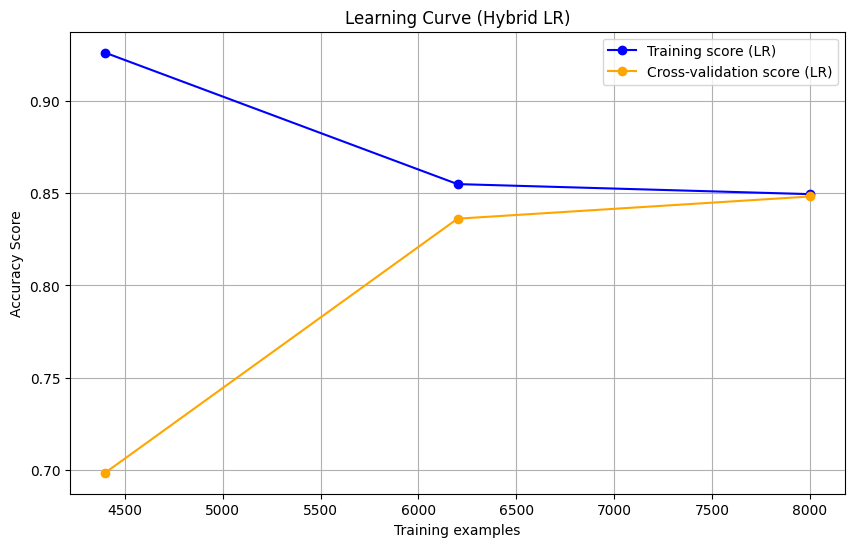


Calculating probabilities (Real CV) for analysis...
Done.

Confusion Matrix (Hybrid LR)


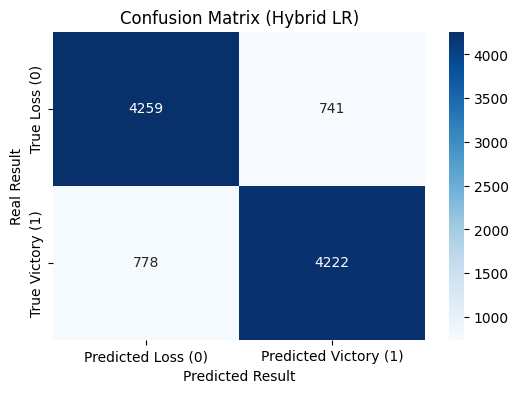

              precision    recall  f1-score   support

    Loss (0)       0.85      0.85      0.85      5000
 Victory (1)       0.85      0.84      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

AUC Score (Area Under the Curve): 0.9213

 Training final 'model_lr_final'
Training LR Model based on all scaled data

 Feature Coefficents (Hybrid Logistic Regression)


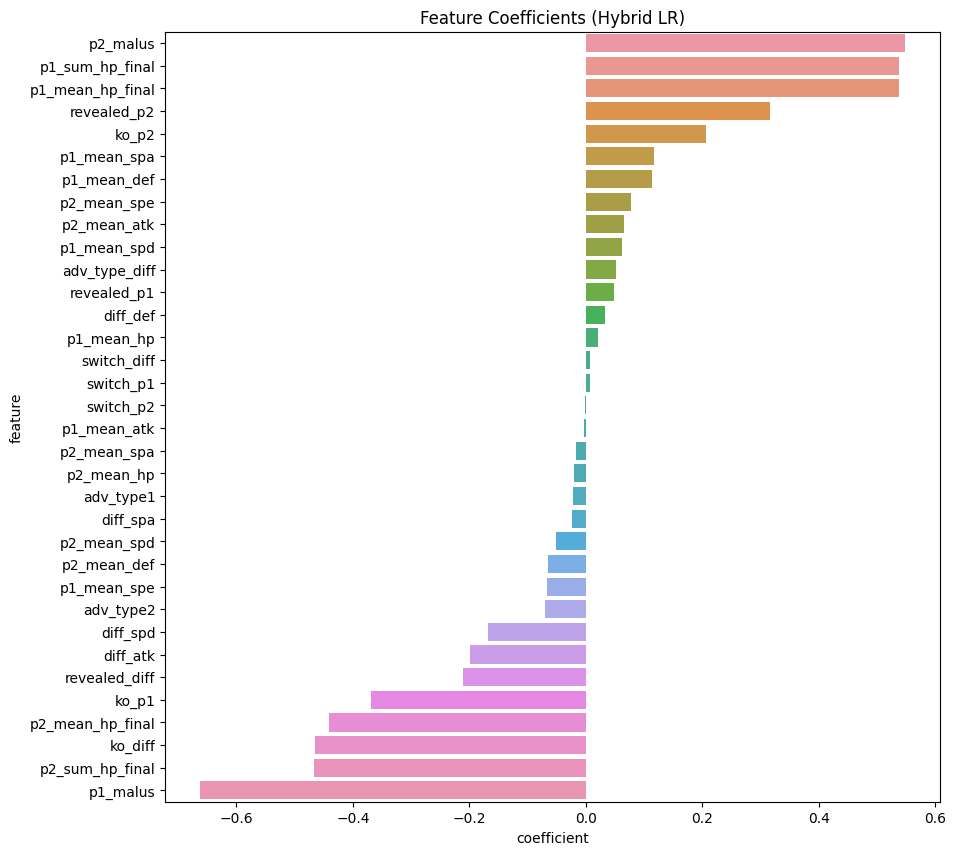


 Submission creation 

'submission.csv' file created with success (based on hybrid logic and LR)!


,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


In [8]:
# Module 4: Submission

import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

if 'final_train_df' not in locals():
    print("ERROR: First execute other cells to get 'final_train_df'.")
else:
    features_to_drop = ['battle_id', 'player_won']
    
    # Select features that exist both in train and test
    common_features = list(set(final_train_df.columns) & set(final_test_df.columns))
    
    # Remove columns to drop
    features = [col for col in common_features if col not in features_to_drop]
    
    X = final_train_df[features].apply(pd.to_numeric, errors='coerce').fillna(0)
    y = final_train_df['player_won']
    
    X_test_submission = final_test_df[features].apply(pd.to_numeric, errors='coerce').fillna(0)
    
    print(f"Data: {len(features)} feature (Hybrid Logic).")

    # Normalization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_test_submission_scaled = scaler.transform(X_test_submission)

    # Define the model
    model_lr_final = LogisticRegression(
        C=0.011,
        penalty='l2',
        solver='liblinear',
        random_state=42,
        max_iter=1000,
    )

    # Validation
    print("\nCalculating Score CV (Hybrid Logic - LR)")
    cv_scores_lr = cross_val_score(model_lr_final, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1)
    
    print("\nResult")
    print(f"5-Fold LR Scores: {cv_scores_lr}")
    print(f"LR Mean Accuracy (CV): {np.mean(cv_scores_lr) * 100:.3f}%")
    print("-------------------")
    
    # Learning Curve
    print("\nCalculating Learning Curve for LR...")
    try:
        train_sizes_abs = np.linspace(0.1, 1.0, 5)
        train_sizes, train_scores, val_scores = learning_curve(
            model_lr_final, X_scaled, y, cv=5, scoring='accuracy',
            n_jobs=-1, train_sizes=train_sizes_abs
        )
        train_scores_mean = np.mean(train_scores, axis=1)
        val_scores_mean = np.mean(val_scores, axis=1)

        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score (LR)")
        plt.plot(train_sizes, val_scores_mean, 'o-', color="orange", label="Cross-validation score (LR)")
        plt.title("Learning Curve (Hybrid LR)")
        plt.xlabel("Training examples")
        plt.ylabel("Accuracy Score")
        plt.legend(loc="best")
        plt.grid()
        plt.show()
    except Exception as e:
        print(f"Error during the creation of the learning curve: {e}")
    
    # Analysis
    print("\nCalculating probabilities (Real CV) for analysis...")
    y_proba_cv = cross_val_predict(
        model_lr_final, X_scaled, y, cv=5, method='predict_proba', n_jobs=-1
    )[:, 1] 
    y_pred_cv = (y_proba_cv > 0.5).astype(int)
    print("Done.")

    # Confusion Matrix
    print("\nConfusion Matrix (Hybrid LR)")
    cm_lr = confusion_matrix(y, y_pred_cv)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted Loss (0)', 'Predicted Victory (1)'],
                yticklabels=['True Loss (0)', 'True Victory (1)'])
    plt.title("Confusion Matrix (Hybrid LR)")
    plt.ylabel("Real Result")
    plt.xlabel("Predicted Result")
    plt.show()
    print(classification_report(y, y_pred_cv, target_names=['Loss (0)', 'Victory (1)']))
    roc_auc = roc_auc_score(y, y_proba_cv)
    print(f"AUC Score (Area Under the Curve): {roc_auc:.4f}")

    # Final Training
    print("\n Training final 'model_lr_final'")
    print("Training LR Model based on all scaled data")
    model_lr_final.fit(X_scaled, y)

    # FEATURE IMPORTANCE (LR Coefficients)
    print("\n Feature Coefficents (Hybrid Logistic Regression)")
    try:
        coefficients = model_lr_final.coef_[0]
        feature_names = X.columns
        df_coefficients = pd.DataFrame({
            'feature': feature_names,
            'coefficient': coefficients
        }).sort_values(by='coefficient', ascending=False)
        
        plt.figure(figsize=(10, 10))
        sns.barplot(x='coefficient', y='feature', data=df_coefficients)
        plt.title("Feature Coefficients (Hybrid LR)")
        plt.show()
    except Exception as e:
        print(f"Error plotting feature coefficients: {e}")

    # Submission
    print("\n Submission creation ")
    test_predictions = model_lr_final.predict(X_test_submission_scaled)
    
    submission_df = pd.DataFrame({
        'battle_id': final_test_df['battle_id'],
        'player_won': test_predictions
    })

    submission_df.to_csv('submission.csv', index=False)
    print("\n'submission.csv' file created with success (based on hybrid logic and LR)!")
    display(submission_df.head())